Importing important libraries and packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:

import numpy as np
df = pd.read_csv("train_LZdllcl.csv")
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


Data Analysis and visualisation

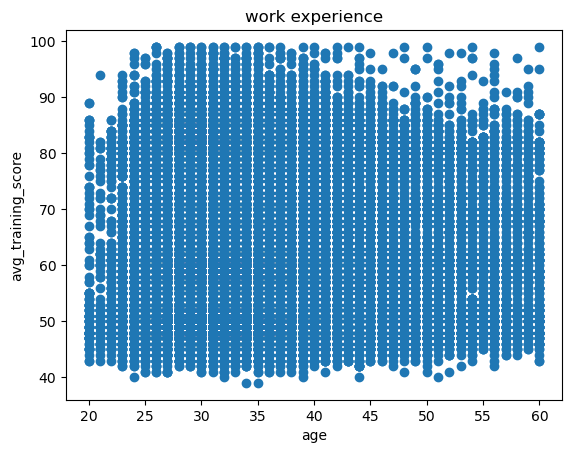

In [3]:
plt.scatter(list(df.age),list(df.avg_training_score))
plt.xlabel('age')
plt.ylabel('avg_training_score')
plt.title('work experience')
plt.show()

In [12]:
girls = df.loc[(df['gender']=='f')&(df['KPIs_met >80%']==1)]
girls

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
11,49017,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,35,5.0,3,1,0,50,1
41,40097,Operations,region_2,Bachelor's,f,other,2,23,4.0,2,1,0,57,0
62,9150,Analytics,region_22,Bachelor's,f,other,1,28,NaN,1,1,0,80,0
65,3342,Operations,region_13,Master's & above,f,sourcing,1,31,3.0,3,1,0,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54768,74226,Technology,region_23,Master's & above,f,sourcing,1,41,5.0,6,1,0,79,0
54770,41012,Technology,region_26,Bachelor's,f,other,1,24,3.0,2,1,0,80,0
54781,76497,HR,region_27,Bachelor's,f,sourcing,1,38,5.0,3,1,0,50,0
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0


In [13]:
boys = df.loc[(df['gender']=='m')&(df['KPIs_met >80%']==1)]
data = {'gender':['boys','girls'],'KPIs_met >80%':[len(boys),len(girls)]}
data = pd.DataFrame(data)
data.set_index('gender',inplace=True)

In [14]:
data

,KPIs_met >80%
gender,
boys,13102
girls,6189


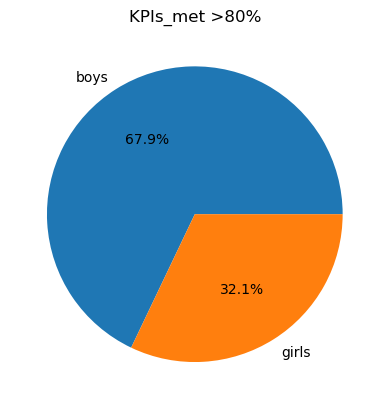

In [15]:
plt.pie(list(data[data.columns[0]]),labels = list(data.index),autopct='%1.1f%%')
plt.title('KPIs_met >80%')
plt.show()


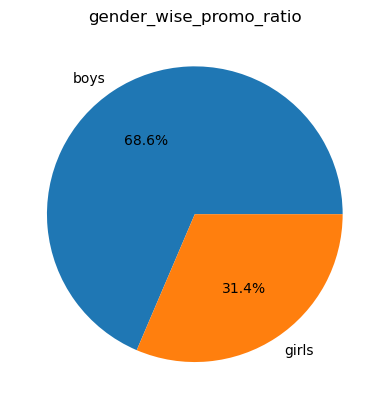

In [16]:
data = {'gender':['boys','girls'],'promoted':[len(df[(df['gender']=='m')&(df['is_promoted']==1)]),len(df[(df['gender']=='f')&(df['is_promoted']==1)])]}
data = pd.DataFrame(data)
data.set_index('gender',inplace=True)

plt.pie(list(data['promoted']),labels=list(data.index),autopct='%1.1f%%')
plt.title('gender_wise_promo_ratio')
plt.show()

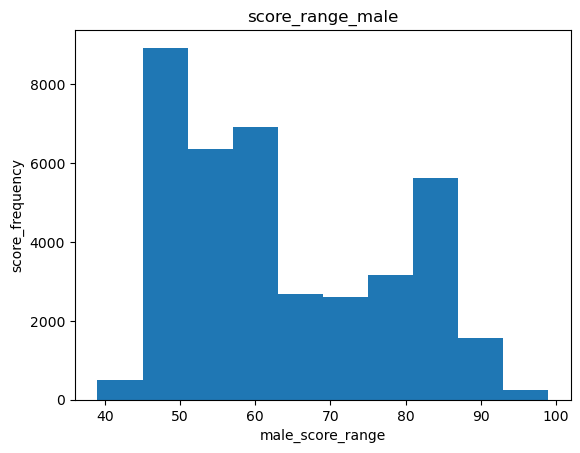

In [17]:
g = df.groupby('gender')
boys_avg = g.get_group('m')
plt.hist(list(boys_avg.avg_training_score))
plt.xlabel('male_score_range')
plt.ylabel('score_frequency')
plt.title('score_range_male')
plt.show()

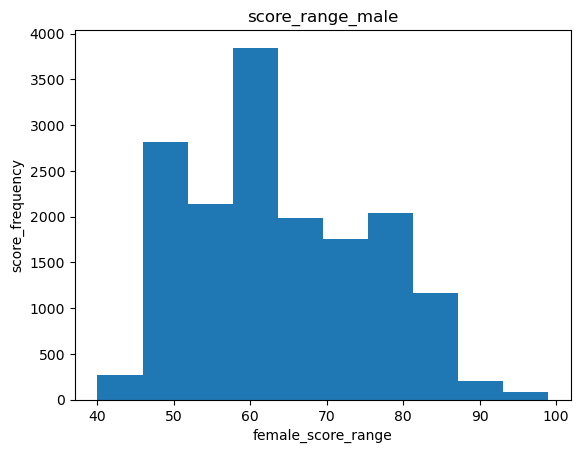

In [18]:
girls_avg = g.get_group('f')
plt.hist(list(girls_avg.avg_training_score))
plt.xlabel('female_score_range')
plt.ylabel('score_frequency')
plt.title('score_range_male')
plt.show()

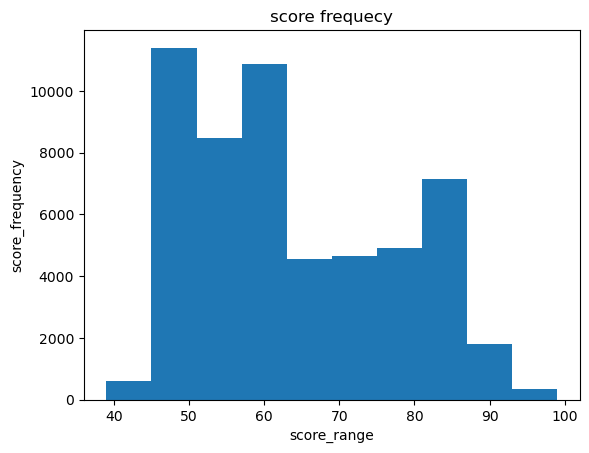

In [19]:
plt.hist(list(df['avg_training_score']))
plt.title('score frequecy')
plt.xlabel('score_range')
plt.ylabel('score_frequency')
plt.show()


Showing the outliers

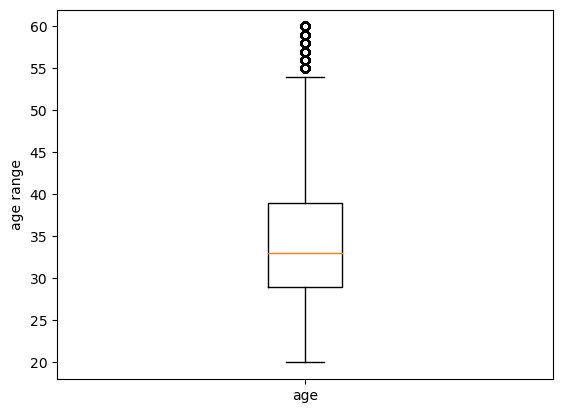

In [20]:
plt.boxplot(list(df['age']),labels=['age'])
plt.ylabel('age range')
plt.show()

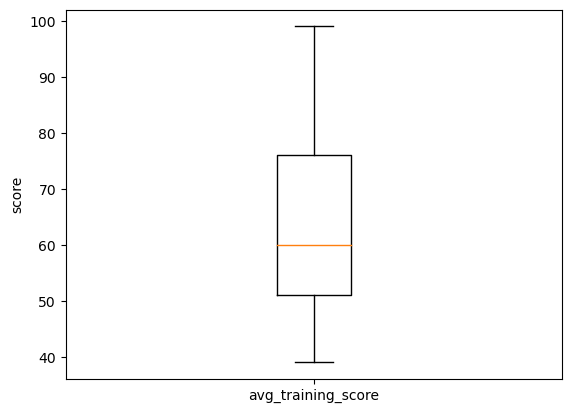

In [21]:
plt.boxplot(list(df['avg_training_score']),labels=['avg_training_score'])
plt.ylabel('score')
plt.show()

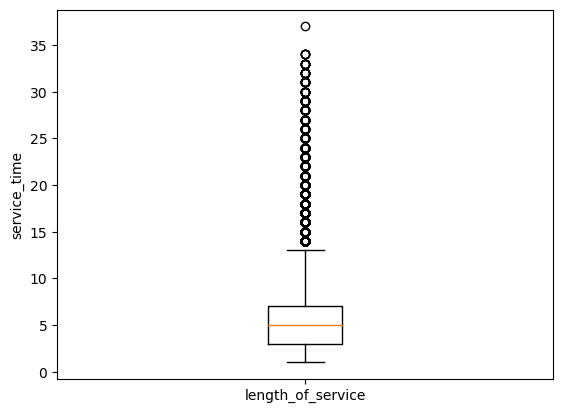

In [22]:
plt.boxplot(list(df['length_of_service']),labels=['length_of_service'])
plt.ylabel('service_time')
plt.show()

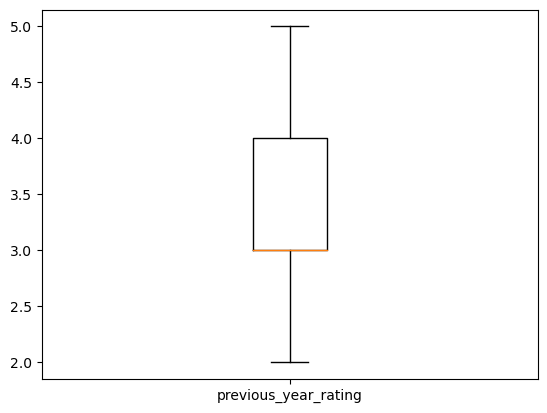

In [44]:
plt.boxplot(list(df['previous_year_rating']),labels=['previous_year_rating'])
plt.show()

Removing outliers (data preprocessing)

In [24]:
#Removing the null values or missing values
for i in df.columns:
  df[i].fillna(df[i].mode()[0], inplace=True)
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

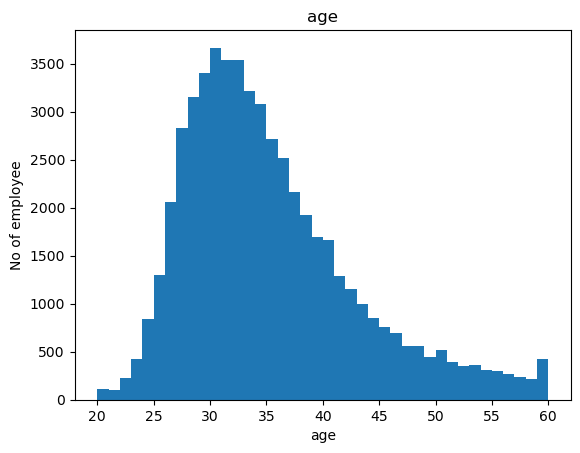

In [25]:
plt.hist(list(df.age),bins=40)
plt.title('age')
plt.xlabel('age')
plt.ylabel('No of employee')
plt.show()

#age is normally distributed

In [26]:
upper_boundary=df['age'].mean() + 3* df['age'].std()
lower_boundary=df['age'].mean() - 3* df['age'].std()
print(lower_boundary), print(upper_boundary),print(df['age'].mean())

11.82340788203259
57.784423091547914
34.80391548679025


(None, None, None)

In [27]:
df.loc[df['age']>=53,'age']=53

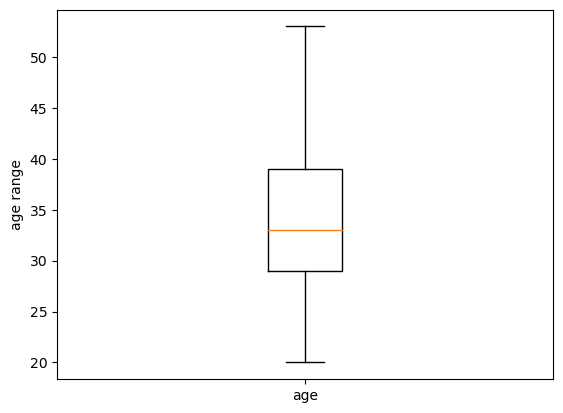

In [28]:
plt.boxplot(list(df['age']),labels=['age'])
plt.ylabel('age range')
plt.show()

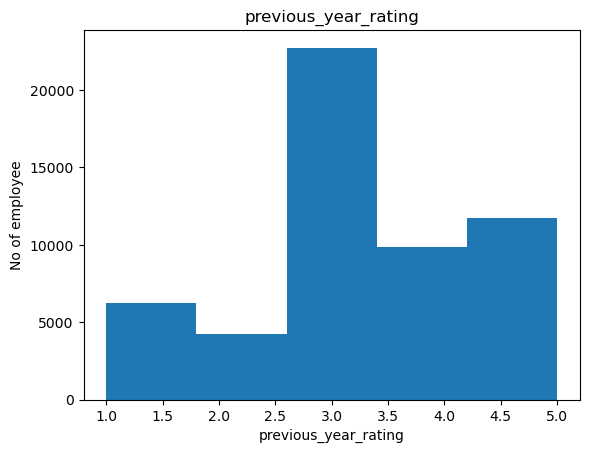

In [29]:
plt.hist(list(df.previous_year_rating),bins=5)
plt.title('previous_year_rating')
plt.xlabel('previous_year_rating')
plt.ylabel('No of employee')
plt.show()


In [30]:
upper_boundary=df['previous_year_rating'].mean() + 3* df['previous_year_rating'].std()
lower_boundary=df['previous_year_rating'].mean() - 3* df['previous_year_rating'].std()
print(lower_boundary), print(upper_boundary),print(df['previous_year_rating'].mean())


-0.33982855539794654
6.948790750697903
3.3044810976499783


(None, None, None)

In [31]:
df.loc[df['previous_year_rating']<=2,'previous_year_rating']=2

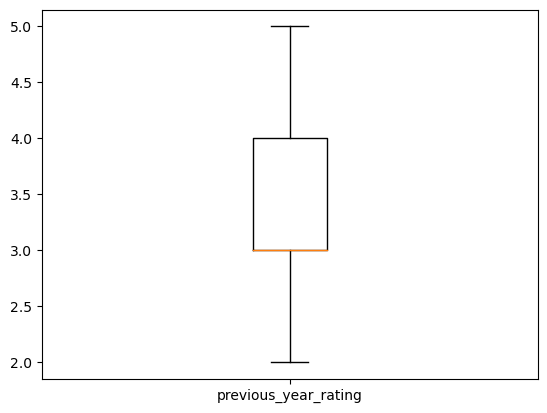

In [32]:
plt.boxplot(list(df['previous_year_rating']),labels=['previous_year_rating'])
plt.show()

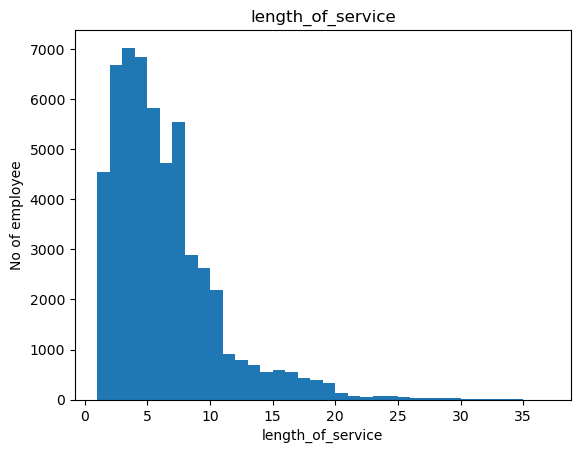

In [33]:
plt.hist(list(df.length_of_service),bins=36)
plt.title('length_of_service')
plt.xlabel('length_of_service')
plt.ylabel('No of employee')
plt.show()

#skew data distribution

In [34]:
#extreme outliers
IQR=df.length_of_service.quantile(0.75)-df.length_of_service.quantile(0.25)
lower_bridge=df['length_of_service'].quantile(0.25)-(IQR*3)
upper_bridge=df['length_of_service'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)



-9.0
19.0


(None, None)

In [35]:
df.loc[df['length_of_service']>=13,'length_of_service']=13

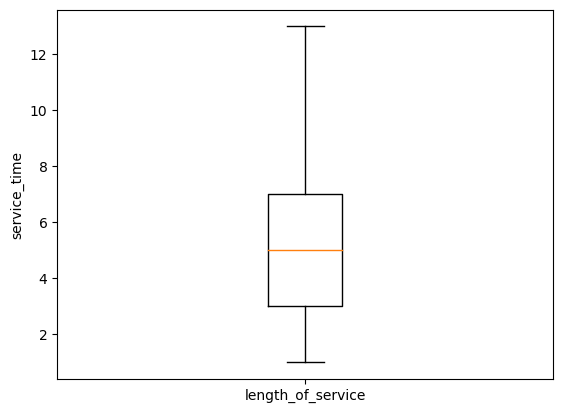

In [36]:
plt.boxplot(list(df['length_of_service']),labels=['length_of_service'])
plt.ylabel('service_time')
plt.show()

Feature selection for trainig the data

In [37]:

y_train = df['is_promoted']
y_train 


0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x_train=df.loc[0:len(df),['education','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]
#x_train['department'] = labelencoder.fit_transform(x_train['department'])
x_train['education'] = labelencoder.fit_transform(x_train['education'])
#x_train['region'] = labelencoder.fit_transform(x_train['region'])
#x_train['recruitment_channel'] = labelencoder.fit_transform(x_train['recruitment_channel'])
x_train


,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,2,1,35,5.0,8,1,0,49
1,0,1,30,5.0,4,0,0,60
2,0,1,34,3.0,7,0,0,50
3,0,2,39,2.0,10,0,0,50
4,0,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...
54803,0,1,48,3.0,13,0,0,78
54804,2,1,37,2.0,6,0,0,56
54805,0,1,27,5.0,3,1,0,79
54806,0,1,29,2.0,2,0,0,45


Preparing the testing data

In [39]:
x_test = pd.read_csv('test_2umaH9m.csv')
x_test = x_test.loc[0:len(x_test),['education','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']]
#x_test['gender'] = np.where(x_test['gender'] == 'f', 0, 1)
#x_test['department'] = labelencoder.fit_transform(x_test['department'])
x_test['education'] = labelencoder.fit_transform(x_test['education'])
#x_test['region'] = labelencoder.fit_transform(x_test['region'])
#x_test['recruitment_channel'] = labelencoder.fit_transform(x_test['recruitment_channel'])
for i in x_test.columns:
  x_test[i].fillna(x_test[i].mode()[0], inplace=True)
x_test.isna().sum()
x_test=x_test.values
x_test

array([[ 0.,  1., 24., ...,  1.,  0., 77.],
       [ 0.,  1., 31., ...,  0.,  0., 51.],
       [ 0.,  1., 31., ...,  0.,  0., 47.],
       ...,
       [ 0.,  1., 26., ...,  0.,  0., 50.],
       [ 0.,  3., 27., ...,  0.,  0., 70.],
       [ 2.,  3., 40., ...,  1.,  0., 89.]])

Training the model

In [40]:
x_train = x_train.values
y_train = y_train.values
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

c:\Users\vivek Negi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing the model

In [41]:
predict_y=classifier.predict(x_test)
predict_y


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Transferring our prediction to csv file

In [42]:
ts = pd.read_csv('submission.csv')

In [43]:
ts['is_promoted'] = list(predict_y)
ts.set_index('employee_id',inplace=True)
ts.to_csv('submission.csv')


End of the model